In [160]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
#function to run the random walker for a specific timepoint
def rand_walker(time, pl, ps, pr):
    #initiate start position at x=0
    positions = [0]
        
    for i in range(time):
        #select a random step direction
        step = np.random.choice([-1,0,1], p=[pl, ps, pr])
        #calculate the new position after the step
        new_position = positions[-1] + step

        #add the new position onto the end of position list
        positions.append(new_position)
        
    return positions

In [162]:
#function to run the random walker for all the 3 timepoints
def rand_walk_runner(walks, pl, ps, pr):
    #intialize list to store all the walks from all ts
    all_positions = []

    #intiaize lists to store all the positions for each t
    all_positions_t10 = []
    all_positions_t100 = []
    all_positions_t1000 = []
    
    for i in range(walks):
        #run the rand walker many times to create a population of t=10s
        all_positions_t10.extend(rand_walker(10, pl, ps, pr))

        #run the rand walker many times to create a population of t=100s
        all_positions_t100.extend(rand_walker(100, pl, ps, pr))

        #run the rand walker many times to create a population of t=1000s
        all_positions_t1000.extend(rand_walker(1000, pl, ps, pr))

    #make all positions with distinction between each t
    all_positions.append(all_positions_t10)
    all_positions.append(all_positions_t100)
    all_positions.append(all_positions_t1000)
    
    return(all_positions)

In [163]:
#function that creates the probability density plot
def density_plotting (all_positions, bars = False):
    #set up the figure and axis
    fig, ax = plt.subplots()

    #define a list of colors for each timepoint
    palette = sns.color_palette("Set1", n_colors=len(all_positions))
    
    #if you dont want to show the bars
    if bars == False:
        #for every timepoint in all the posiitons
        for i, (timepoint, color) in enumerate(zip(all_positions, palette)):
            #decide which timepoint you are on
            if(i == 0):
                num_run = 10
            elif(i == 1):
                num_run = 100
            elif(i == 2):
                num_run = 1000
            
            #create the legand labels
            label = f'Timepoint {num_run}'
            #create the probability density plot for each timeset
            sns.kdeplot(timepoint, label=label, color=color)
    
    #if you do want to show the bars
    elif bars == True:
        #for every timepoint in all the positions
        for i, (timepoint, color) in enumerate(zip(all_positions, palette)):
            #decide which timepoint you are on
            if(i == 0):
                num_run = 10
            elif(i == 1):
                num_run = 100
            elif(i == 2):
                num_run = 1000
            
            #create the legand lables
            label = f'Timepoint {num_run}'
            #create the probability density plot for each timeset with the bars
            sns.histplot(timepoint, label=label, kde=True, color=color, stat="probability", common_norm=False)

    # Add labels and a title and legand
    plt.xlabel('Positions')
    plt.ylabel('Probability Density')
    plt.title('Probability Density')
    plt.legend()
    
    #return the plot
    return (plt.gcf())

In [164]:
#function that creates the cumulative probability function
def cumulative_plotting(all_positions):
    #set up the figure and axis
    fig, ax = plt.subplots()

    #define a list of colors for each timepoint
    palette = sns.color_palette("Set1", n_colors=len(all_positions))

    #for every timepoint in all the positions
    for i, (timepoint, color) in enumerate(zip(all_positions, palette)):
        #decide which timepoint you are on
        if(i == 0):
            num_run = 10
        elif(i == 1):
            num_run = 100
        elif(i == 2):
            num_run = 1000
            
        #create the legand lables
        label = f'Timepoint {num_run}'
        #create the cumulative probability functions
        sns.kdeplot(timepoint, label=label, cumulative=True, color=color)

    #add labels, a title, and legand
    plt.xlabel('Position')
    plt.ylabel('Cumulative Probability')
    plt.title('Cumulative Probability Functions')
    plt.legend()

    #return the plot
    return (plt.gcf())

Figure(432x288)
Figure(432x288)
Figure(432x288)


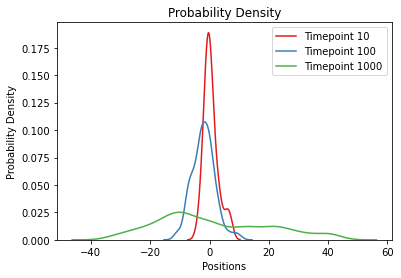

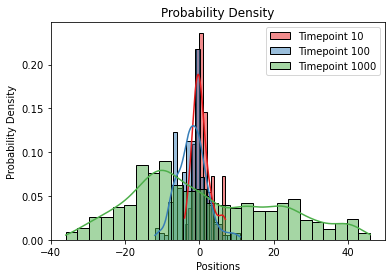

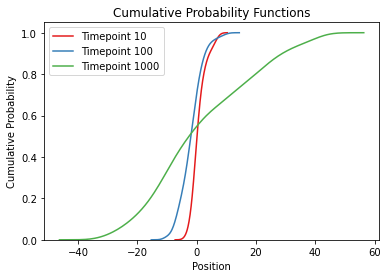

In [165]:
#create a dataset with all the walk position results for 1/3
all_positions = rand_walk_runner(5, 1/3, 1/3, 1/3)

#print the probabililty density plot wihtout bars
print(density_plotting(all_positions))
#print the porbabiity desntiy plot with bars
print(density_plotting(all_positions, True))

#print the cumulative probabiity functions
print(cumulative_plotting(all_positions))

Figure(432x288)
Figure(432x288)
Figure(432x288)


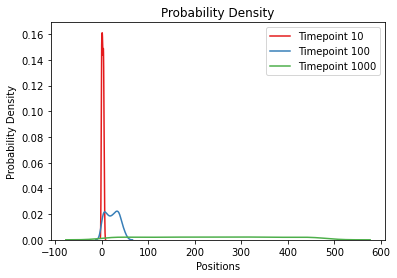

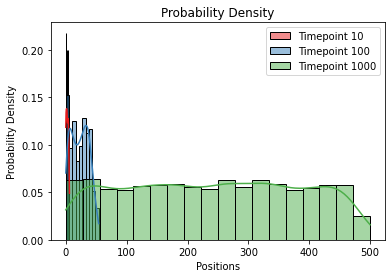

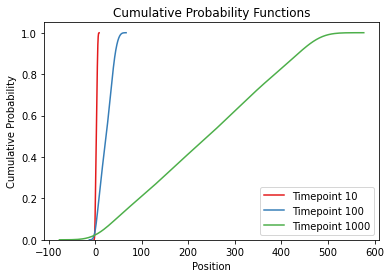

In [166]:
#create a dataset with all the walk position results for 0, 1/2, 1/2
all_positions = rand_walk_runner(5, 0, 1/2, 1/2)

#print the probabililty density plot wihtout bars
print(density_plotting(all_positions))
#print the porbabiity desntiy plot with bars
print(density_plotting(all_positions, True))

#print the cumulative probabiity functions
print(cumulative_plotting(all_positions))

Write a paragraph:
Why do these graphs look different?

These graphs look different because the probability of the walker moving has changed drastically. In the first set of graphs, the probability of the walker moving left, right, or staying were all equal which produces a more normal distribution for all three of the timpoints. For the second set of graphs, the proabbility of the walker moving left was reduced to 0. This makes a huge difference already because as the starting point is 0, there will be no positions less than 0. This we can see in the graphs produced as there is indeed no positions lower than 0. The probability of moving right and staying were also changed to be and equal 1/2. This means that the distribution will be flatter as we can again see in the graphs.